
## ERA-5 Weather reanalysis

______

Python code to load wethar info from ECMWF ERA5-Land


Docs: [ERA5-Land](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-land?tab=overview)

ERA5-Land is a reanalysis dataset providing a consistent view of the evolution of land variables over several decades at an enhanced resolution compared to ERA5. Reanalysis combines model data with observations from across the world into a globally complete and consistent dataset using the laws of physics. Reanalysis produces data that goes several decades back in time, providing an accurate description of the climate of the past. 

Docs: [cdsapi](https://pypi.org/project/cdsapi/)

To reproduce results user should add credintails in file `~/.cdsapirc`

File:

`url: https://cds.climate.copernicus.eu/api/v2
key: *your own key generated by ECMWF web-site*`

In [14]:
import json 
import cdsapi
import os
import xarray as xr
from netCDF4 import Dataset

In [15]:
# Boundary box of target region 
xmin, xmax, ymin, ymax = 18.83337, 72.00005, 40.99999, 68.16666 

### Request - ERA5 

_____

temperature - 2 meters

In [6]:


c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-land',
    {
        'format': 'netcdf',
        'variable': '2m_temperature',
        'year': [
            '2019', '2020',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'time': [
            '00:00', '03:00', '06:00',
            '09:00', '12:00', '15:00',
            '18:00', '21:00',
        ],
        'area': [
            ymax, xmin, ymin,
            ymax,
        ],
    },
    'download.nc')

2021-06-25 11:43:57,418 INFO Welcome to the CDS
2021-06-25 11:43:57,451 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2021-06-25 11:43:57,579 INFO Request is queued
2021-06-25 11:43:58,659 INFO Request is running
2021-06-25 12:06:19,205 INFO Request is completed
2021-06-25 12:06:19,227 INFO Downloading https://download-0009.copernicus-climate.eu/cache-compute-0009/cache/data3/adaptor.mars.internal-1624611875.4333596-19828-9-17d7964e-e552-4152-9991-85289612dbe1.nc to download.nc (1.5G)
2021-06-25 12:26:05,163 INFO Download rate 1.3M/s     


Result(content_length=1565817824,content_type=application/x-netcdf,location=https://download-0009.copernicus-climate.eu/cache-compute-0009/cache/data3/adaptor.mars.internal-1624611875.4333596-19828-9-17d7964e-e552-4152-9991-85289612dbe1.nc)

In [6]:
import xarray as xr 
temp = xr.open_dataset('./download.nc') # read the NetCDF file

In [7]:
# resample to daily timp step and select max/min for each day 
day_max = temp.t2m.resample(time='D').max()
day_min = temp.t2m.resample(time='D').min()

In [8]:
# resample to month time step and compute mean temperature
month_mean_min = day_min.resample(time='1m').mean(skipna=True)
month_mean_max = day_max.resample(time='1m').mean(skipna=True)

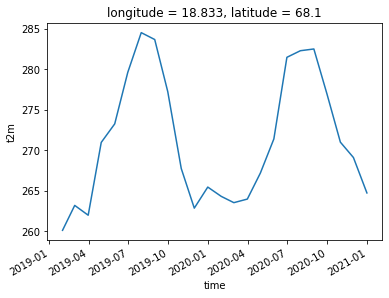

In [11]:
# select first long/lat and plot mean max temperatures
month_mean_max[:, 0,0].plot()

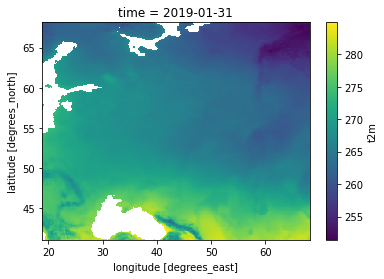

In [12]:
# select first month and plot mean max temperatures
month_mean_max[0, :, :].plot()

### Request - ERA5 

_____

Percepitations 

In [16]:


c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-land',
    {
        'format': 'netcdf',
        'variable': 'total_precipitation',
        'year': [
            '2019', '2020',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'time': [
            '00:00', '03:00', '06:00',
            '09:00', '12:00', '15:00',
            '18:00', '21:00',
        ],
        'area': [
            ymax, xmin, ymin,
            ymax,
        ],
    },
    'download_perp.nc')

2021-06-28 18:09:57,934 INFO Welcome to the CDS
2021-06-28 18:09:57,937 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2021-06-28 18:09:58,049 INFO Request is queued
2021-06-28 18:10:03,032 INFO Request is running
2021-06-28 18:34:21,047 INFO Request is completed
2021-06-28 18:34:21,057 INFO Downloading https://download-0003.copernicus-climate.eu/cache-compute-0003/cache/data9/adaptor.mars.internal-1624894294.7997613-13868-14-1366c4a0-5b8f-47dd-830d-798ba5f5dd08.nc to download_perp.nc (1.5G)
2021-06-28 18:41:39,795 INFO Download rate 3.4M/s    


Result(content_length=1565817824,content_type=application/x-netcdf,location=https://download-0003.copernicus-climate.eu/cache-compute-0003/cache/data9/adaptor.mars.internal-1624894294.7997613-13868-14-1366c4a0-5b8f-47dd-830d-798ba5f5dd08.nc)

## RioXarray 

_____

Convert `netCDF` data into `GeoTIFF`

In [60]:
import rioxarray

In [63]:
# write mean max temperatures in K
month_mean_max.rio.write_crs("epsg:4326", inplace=True)
month_mean_max.rio.to_raster('month_mean_max_K.tiff')

In [64]:
# write mean min temperatures in K
month_mean_min.rio.write_crs("epsg:4326", inplace=True)
month_mean_min.rio.to_raster('month_mean_min_K.tiff')